<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Trabajo Fin de Master</header1></center>
<left><h1>5. Desarrollo específico de la contribución</header1></left>

**Presentado por:  Andres Mauricio Triana Sanchez** <br>
**Fecha: 20/06/2024**

## Importación de librerias necesarias

In [2]:
# Para esta actividad se importarán las siguientes librerías:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pydotplus
import seaborn as sns
import numpy as np
# Importamos hvplot - Api graficación para Panda. Gráficos dinámicos
import hvplot.pandas
import os
# Se ignroran los mensajes warnings
import warnings
warnings.filterwarnings('ignore')

## Cargar el Dataset

In [3]:
# Código para cargar el Dataset
url = 'dataregresion.xlsx'
dataregresion = pd.read_excel(url)

## Modelo RandomForestRegressor() - Algoritmo de Regresión

**Preprocesamiento del dataset.**

>- Se crean dos conjuntos de datos:<br>
**X** para las variables de entrada, sin el atributo **totalInvoiceNet**<br>
**y** con la variable objetivo/salida(**totalInvoiceNet**)
>- Se normaliza X, ya que el conjunto de datos es disperso y asimetrico en sus atributos

In [4]:
# Se elimina la varibale objetivo para el conjunto de datos X
X = dataregresion.drop(['totalInvoiceNet'], axis=1)
# Se crea el conjunto de datos y con la variable objetivo
y = dataregresion['totalInvoiceNet']

In [6]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#X=pd.DataFrame(X, columns=dataregresion.columns.drop('totalTransactions'))

In [7]:
# Velidamos el conjunto de datos X
X.head(10)

,Month,tenant-id,vendor-id,documentType-id,totalTransactions
0,1,4,9,3,1
1,1,4,10,1,29
2,1,4,13,1,17
3,1,4,14,1,2
4,1,4,17,1,13
5,1,4,18,1,14
6,1,4,19,1,9
7,1,4,23,3,1
8,1,4,26,1,10
9,1,4,27,1,2


In [8]:
# Velidamos el conjunto de datos y
y.head(10)

0     52.09029
1    177.74278
2    350.79980
3     20.14600
4     12.73039
5     42.63870
6     16.10337
7      0.23920
8     57.43577
9      8.53015
Name: totalInvoiceNet, dtype: float64

**División del dataset en datos de entrenamiento y datos de test**

In [9]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

>- La estrategia de evaluación es 70% para el entrenamiento y 30% para la validación del conjunto de datos
>- Con random_state=1, se obtiene el mismo conjunto de datos de entrenamiento y validacion en diferentes ejecuciones

**Dimensionalidad del conjunto de datos de entranamiento y validacion**

In [10]:
#Dimensionalidad del conjunto de datos de entrenamiento y validación
print('Conjunto de datos de Entrenamiento', X_train.shape)
print('Conjunto de datos Variable Objetivo Entrenamiento \'totalTransactions\'', Y_train.shape)
print('Conjunto de datos de Validación', X_validation.shape)
print('Conjunto de datos Variable Objetivo Validacion \'totalTransactions\'', Y_validation.shape)

Conjunto de datos de Entrenamiento (35870, 5)
Conjunto de datos Variable Objetivo Entrenamiento 'totalTransactions' (35870,)
Conjunto de datos de Validación (15373, 5)
Conjunto de datos Variable Objetivo Validacion 'totalTransactions' (15373,)


**Ajuste del modelo de regresión propuesto**

>- RandomForestRegressor(), con el fin de obtener una exactitud mas precisa al combinar N arboles de decisión. Recurso computacional: todos los procesadores n-jobs: -1. Criterio: 'squared_error' por defecto.
>- n_estimators (número de arboles) por defecto 100. 
>- El parametro 'random_state=1' es para generar el mismo resultado a predecir en cada ejecución

**Se cargan los algoritmos:** Se crea una lista con los algoritmos a comparar

In [11]:
#Carga de Algoritmos
models = []
models.append(('RFR', RandomForestRegressor(n_jobs=-1, random_state=1, n_estimators=100)))

In [12]:
#models[i][0] = Nombre modelo
#models[i][1] = Modelo
for name, model in models:
    print('Modelo =', name, " - ", model)
    model

Modelo = RFR  -  RandomForestRegressor(n_jobs=-1, random_state=1)


In [13]:
#Confirmamos las caracteristicas del modelo
models[0][1]

RandomForestRegressor(n_jobs=-1, random_state=1)

**Se crean listas para guardar los resultados a comparar:** 

In [14]:
# Listas para guardar resultados y nombre del algoritmo
prediccionTrain = []
prediccionTest = []

In [15]:
# Entrenamos el modelo
models[0][1].fit(X_train, Y_train)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [16]:
# Se prueba el modelo
prediccionTrain.append(models[0][1].predict(X_train))
prediccionTest.append(models[0][1].predict(X_validation))

In [17]:
# Visualizamos las primeras 20 predicciones para Entrenamiento
prediccionTrain[0][:20]

array([1.92971340e+00, 5.66486403e+02, 3.09233140e+00, 2.97670570e+00,
       5.91228350e+00, 1.86990879e+01, 1.13027720e+00, 1.55535095e+01,
       2.08222860e+00, 5.93285200e+00, 7.93197720e+00, 1.53074225e+01,
       2.76206430e+00, 9.06667600e-01, 7.37255284e+01, 4.77145730e+00,
       8.51196660e+00, 2.81316700e-01, 2.76078577e+05, 1.40536605e+02])

In [18]:
# Visualizamos las primeras 20 predicciones para Validacion
prediccionTest[0][:20]

array([  0.6553555,   2.1327194,   9.5192433,  48.1261587,   3.1913185,
        14.7249863, 542.8561163,   8.2345312,  10.6573001,   4.0944147,
        10.8508035,   5.0050049,   7.0324635,   9.6512626,   7.5461158,
         6.3260562,  14.2985465,   5.2765176,   6.5080283,   9.6595118])

In [37]:
print('Predicción de ejemplo variable Objetivo totalInvoiceNet')
print('RandomForestRegressor =', models[0][1].predict([[5, 59, 16, 1, 50]]))
print('RandomForestRegressor =', models[0][1].predict([[8, 14, 5, 2, 50]]))
print('RandomForestRegressor =', models[0][1].predict([[9, 12, 112, 3, 50]]))
print('RandomForestRegressor =', models[0][1].predict([[10, 6, 247, 4, 50]]))
print('RandomForestRegressor =', models[0][1].predict([[12, 33, 158, 5, 50]]))

Predicción de ejemplo variable Objetivo totalInvoiceNet
RandomForestRegressor = [373.8912454]
RandomForestRegressor = [2464.8712883]
RandomForestRegressor = [209.327734]
RandomForestRegressor = [289.2279739]
RandomForestRegressor = [494.0037208]


**Evaluación Modelo RandomForestRegressor()**

In [38]:
#Código para mostrar la comparación de métricas de desempeño
for i in range(1):
    print("----- Model Evaluation (totalInvoiceNet)",models[i][0]," -----")
    print("R2 Entrenamiento:", metrics.r2_score(Y_train,prediccionTrain[i]))
    print("R2 Validación:", metrics.r2_score(Y_validation,prediccionTest[i]))
    print("MAE Entrenamiento:",metrics.mean_absolute_error(Y_train,prediccionTrain[i]))
    print("MAE Validacion:",metrics.mean_absolute_error(Y_validation,prediccionTest[i]))
    print("MSE Entrenamiento:",metrics.mean_squared_error(Y_train,prediccionTrain[i]))
    print("MSE Validacion:",metrics.mean_squared_error(Y_validation,prediccionTest[i]))
    print("RMSE Entrenamiento:",np.sqrt(metrics.mean_squared_error(Y_train,prediccionTrain[i])))
    print("RMSE Validacion:",np.sqrt(metrics.mean_squared_error(Y_validation,prediccionTest[i])))
    print("\n")

----- Model Evaluation (totalInvoiceNet) RFR  -----
R2 Entrenamiento: 0.9373739356032254
R2 Validación: 0.34137090419522775
MAE Entrenamiento: 42.64549813614108
MAE Validacion: 166.70493819896666
MSE Entrenamiento: 1724000.621056602
MSE Validacion: 31121540.002198663
RMSE Entrenamiento: 1313.0120414743355
RMSE Validacion: 5578.668300069351




**Gráficamos los Valores Reales y de Predicción del conjunto de datos para la validación de cada modelo**

In [20]:
# Random Forrest Regressor
pd.DataFrame({'Valores-Reales-Validacion': Y_validation, 'Valores-Prediccion': prediccionTest[0]}).hvplot.scatter(x='Valores-Reales-Validacion', y='Valores-Prediccion',
               c='Valores-Prediccion',legend="bottom", title="RandomForrestRegressor()")

:Scatter   [Valores-Reales-Validacion]   (Valores-Prediccion)

**Graficamos el Error en la predicción con los datos de validación**

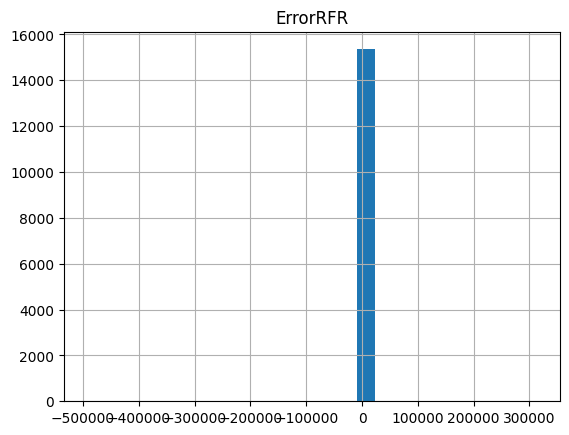

In [21]:
#Graficammos el error
error = pd.DataFrame({"ErrorRFR": prediccionTest[0]-Y_validation})
error.hist(bins = 25)
pyplot.show()

**Se Comparan las predicciones con un diagrama de cajas y bigotes**

In [22]:
names=list()
names.append('RFR')

In [23]:
tmp = pd.DataFrame({"RFR": prediccionTest[0]})

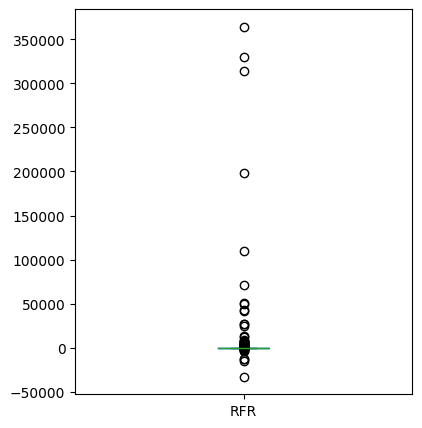

In [24]:
tmp.plot(kind='box', figsize=(20,5), subplots=True, layout=(1,4), sharex=False, sharey=False)
pyplot.show()

**Pruebas**

In [34]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=None)

In [35]:
cv_scores = cross_val_score(models[0][1], X_train, Y_train, cv=kfold)

In [36]:
if cv_scores is not None:
    cv_scores = [round(num, 3) for num in cv_scores]
    print('Se obtienen los siguientes coeficientes de determinación:')
    print(cv_scores, '\n')
    print(f'Max R-Squared: {max(cv_scores)}')
    print(f'Min R-Squared: {min(cv_scores)}')
    print('Promedio R-Squared: {:.3f}'.format(np.mean(cv_scores)))
    print('Desviación Estándar: {:.3f}'.format(np.std(cv_scores)))
    print(f'Intervalo de confianza 95%: {np.quantile(cv_scores, [0.025, 0.975])}')

Se obtienen los siguientes coeficientes de determinación:
[0.919, 0.023, -0.139, -111.078, 0.783, 0.938, -0.279, -0.024, -0.314, -5.747] 

Max R-Squared: 0.938
Min R-Squared: -111.078
Promedio R-Squared: -11.492
Desviación Estándar: 33.246
Intervalo de confianza 95%: [-87.378525   0.933725]


## Evaluación detallada del Modelo RandomForestRegressor()